In [2]:
import sys 
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import pprint

# ml imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits

#pytorch imports
from torchvision import transforms
from torchvision import datasets
import torch
from torch.utils.data import DataLoader
from torch import nn
import torch.optim as optim
from tqdm import tqdm
from torch.utils.data import Dataset, random_split
from torchvision.transforms import ToTensor

sys.path.append("../")
from experimenter import *

# Load Datasets

In [3]:
#digits dataset
digits_X, digits_y = load_digits(return_X_y=True)


#fashion dataset
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [5]:
# split data
test_size = 0.2
train_size = 1 - test_size
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(digits_X, digits_y, test_size=test_size, random_state=random_state, shuffle=True)

print("X shape: ", X_train.shape)
print("y shape: ", y_train.shape)

X shape:  (1437, 64)
y shape:  (1437,)


# Global Variables

In [6]:
# customize based on training data
dataset_name = "Digits"
data_sizes = [20, 50, 100, 200, 455]
datetime = dt.datetime.now().strftime(date_format)
experiment_info = (dataset_name, data_sizes, X_train, y_train, X_test, y_test)
constants = (data_sizes, datetime, dataset_name)
pp = pprint.PrettyPrinter(indent=4)

# Model Training

In [7]:
# RANDOM FOREST
new_set = False
if new_set:
    datetime = dt.datetime.now().strftime(date_format)
model_name = 'randomforest'

rfr_results = benchmark_ml(model_name, experiment_info, datetime)
benchmarking.update(rfr_results)

Benchmarking randomforest:  24%|████             | 6/25 [00:01<00:03,  4.96it/s]

Made a new directory results/Digits/randomforest/npy_files


Benchmarking randomforest: 100%|████████████████| 25/25 [00:04<00:00,  5.01it/s]


In [8]:
# K NEAREST NEIGHBORS
new_set = False
if new_set:
    datetime = dt.datetime.now().strftime(date_format)
model_name = 'knn'

knn_results = benchmark_ml(model_name, experiment_info, datetime)
benchmarking.update(knn_results)

Benchmarking knn:  36%|█████████▎                | 9/25 [00:00<00:00, 28.29it/s]

Made a new directory results/Digits/knn/npy_files


Benchmarking knn: 100%|█████████████████████████| 25/25 [00:00<00:00, 25.43it/s]


In [9]:
# CONVULUTIONAL NEURAL NETWORK
new_set = False
if new_set:
    datetime = dt.datetime.now().strftime(date_format)
model_name = 'cnn'

In [10]:
# METRIC LEARNING
new_set = False
if new_set:
    datetime = dt.datetime.now().strftime(date_format)
model_name = 'metric'

In [11]:
# OUR MODEL
new_set = False
if new_set:
    datetime = dt.datetime.now().strftime(date_format)
model_name = 'ours'

# our_results = benchmark_ml(model_name, experiment_info, datetime)
# benchmarking.update(our_results)

# Model Evaluation

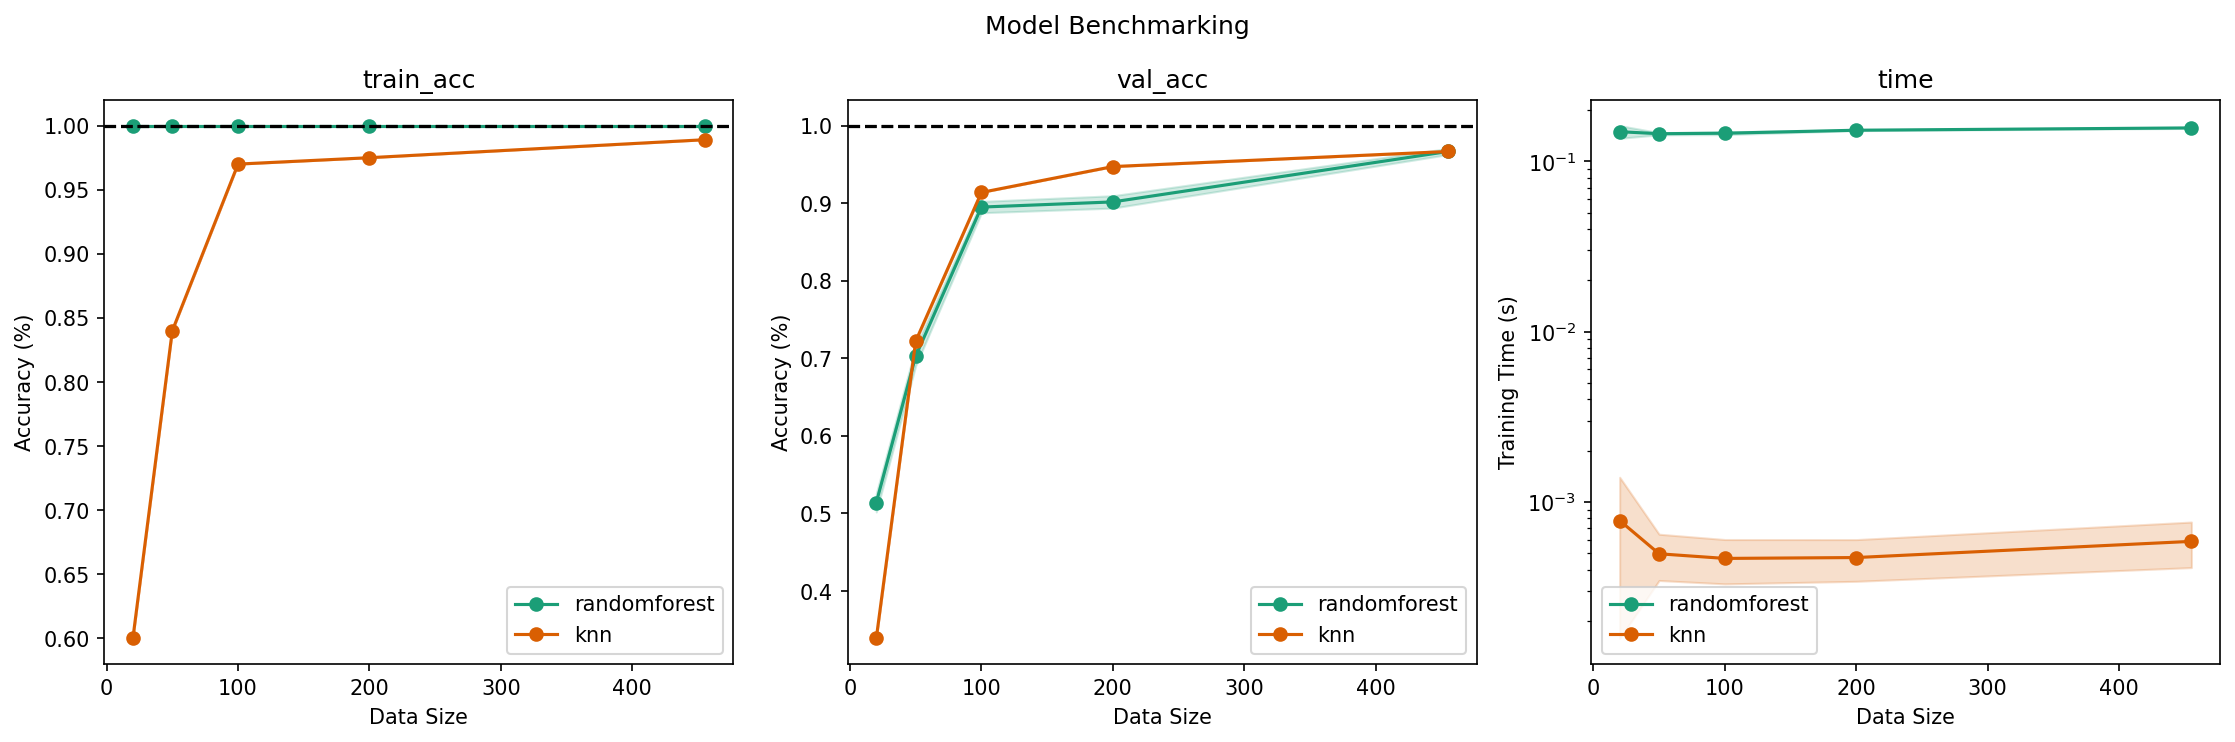

In [13]:
plot_results(benchmarking, constants, 
             save_fig=True, 
             from_data=False)

In [14]:
# pretty print the benchmarking results with package
pp.pprint(benchmarking)

{   'knn': {   0: {   'time': array([0.00200717, 0.00059458, 0.00034804, 0.00034096, 0.00039571]),
                      'train_acc': array([0.6       , 0.84      , 0.97      , 0.975     , 0.98901099]),
                      'val_acc': array([0.33888889, 0.72222222, 0.91388889, 0.94722222, 0.96666667])},
               1: {   'time': array([0.00042942, 0.00034429, 0.00034721, 0.00035613, 0.00076267]),
                      'train_acc': array([0.6       , 0.84      , 0.97      , 0.975     , 0.98901099]),
                      'val_acc': array([0.33888889, 0.72222222, 0.91388889, 0.94722222, 0.96666667])},
               2: {   'time': array([0.00038421, 0.00033796, 0.00037279, 0.000687  , 0.00048329]),
                      'train_acc': array([0.6       , 0.84      , 0.97      , 0.975     , 0.98901099]),
                      'val_acc': array([0.33888889, 0.72222222, 0.91388889, 0.94722222, 0.96666667])},
               3: {   'time': array([0.00053308, 0.00072867, 0.00059313, 0.000541 